In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')

In [ ]:
# Displaying First Few Rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Checking Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Checking For Missing Values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Converting Date Columns to Datetime Format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
# Dropping Duplicate Rows if Any
df.drop_duplicates(inplace=True)

In [ ]:
# Statistics Summary of Sales and Profit
df[['Sales', 'Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [ ]:
# Calculating Total Sales and Total Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


In [ ]:
# Extracting Month from Order Date
df['Month'] = pd.to_datetime(df['Order Date']).dt.month

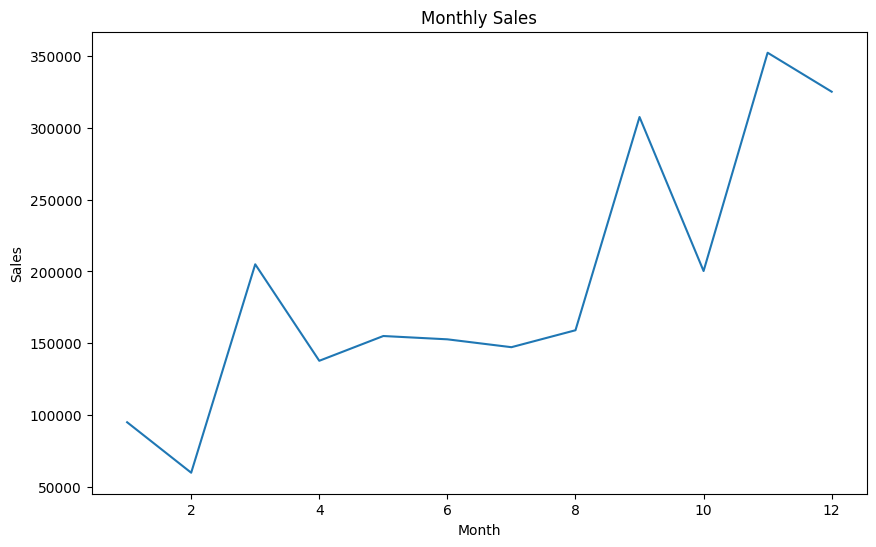

In [ ]:
# Monthly Sales
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

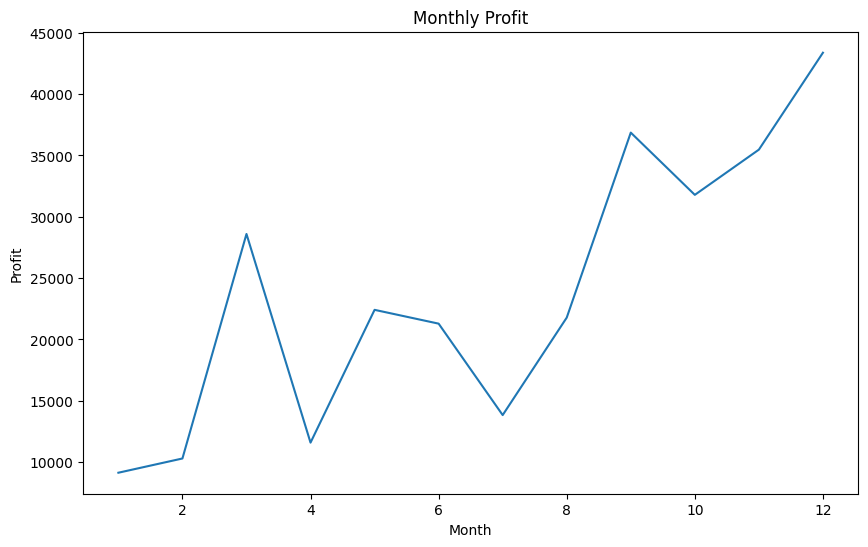

In [ ]:
# Monthly Profit
monthly_profit = df.groupby('Month')['Profit'].sum()
monthly_profit.plot(kind='line', figsize=(10, 6), title='Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

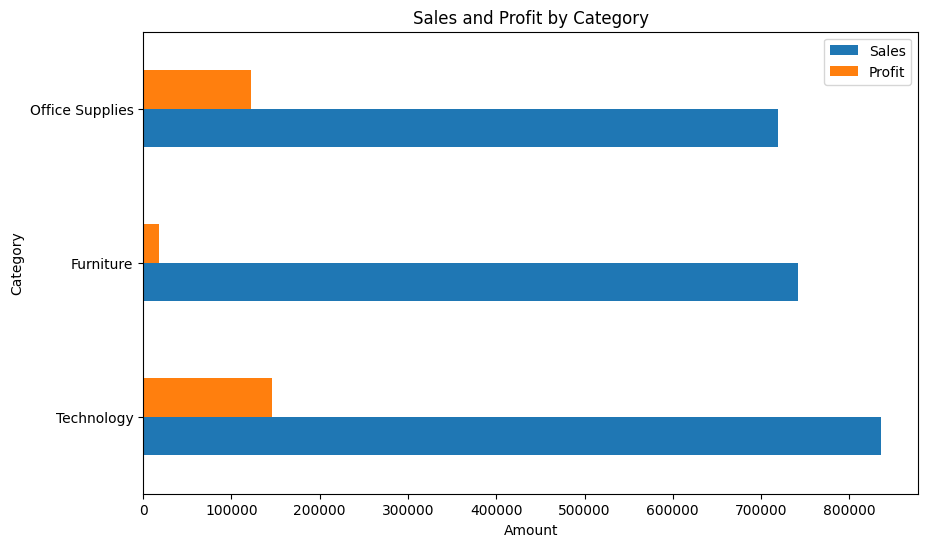

In [ ]:
# Category wise Sales and Profit Analysis
category_group = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_group.plot(kind='barh', figsize=(10, 6), title='Sales and Profit by Category')
plt.xlabel('Amount')
plt.ylabel('Category')
plt.show()

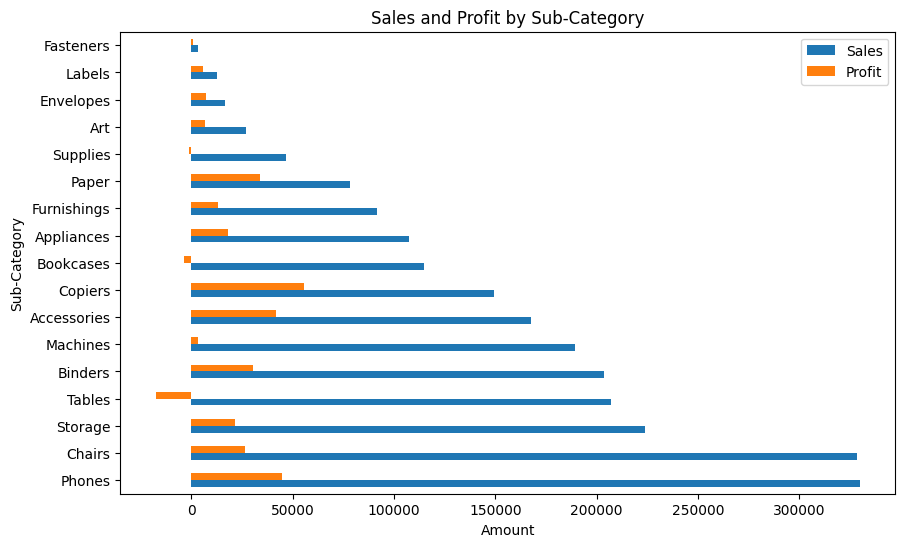

In [ ]:
# Sub-Category wise Sales and Profit Analysis
subcategory_group = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
subcategory_group.plot(kind='barh', figsize=(10, 6), title='Sales and Profit by Sub-Category')
plt.xlabel('Amount')
plt.ylabel('Sub-Category')
plt.show()

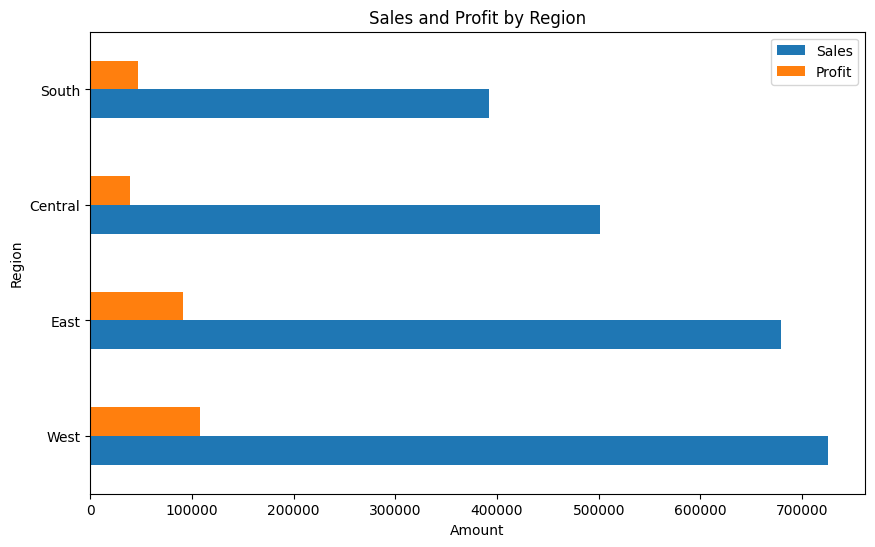

In [ ]:
# Region wise Sales and Profit Analysis
region_group = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
region_group.plot(kind='barh', figsize=(10, 6), title='Sales and Profit by Region')
plt.xlabel('Amount')
plt.ylabel('Region')
plt.show()

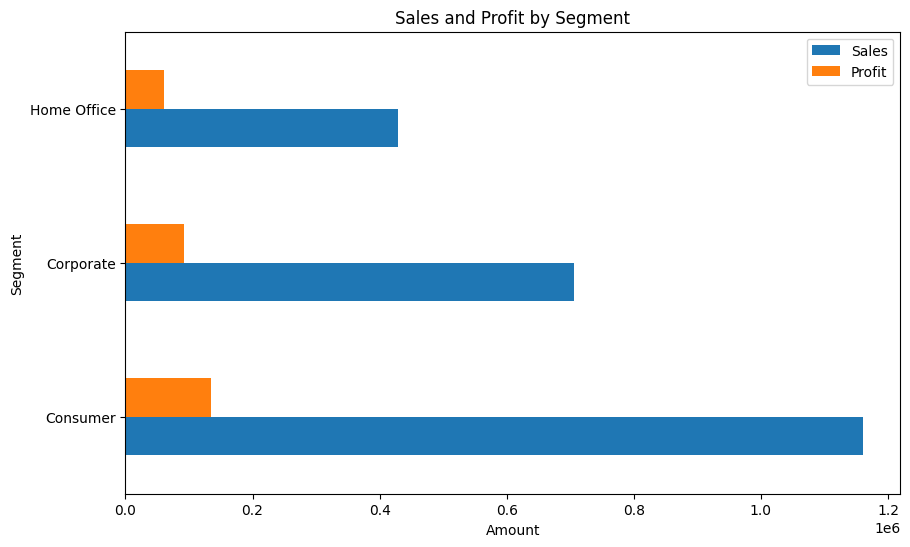

In [ ]:
# Segment wise Sales and Profit Analysis
segment_group = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
segment_group.plot(kind='barh', figsize=(10, 6), title='Sales and Profit by Segment')
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.show()

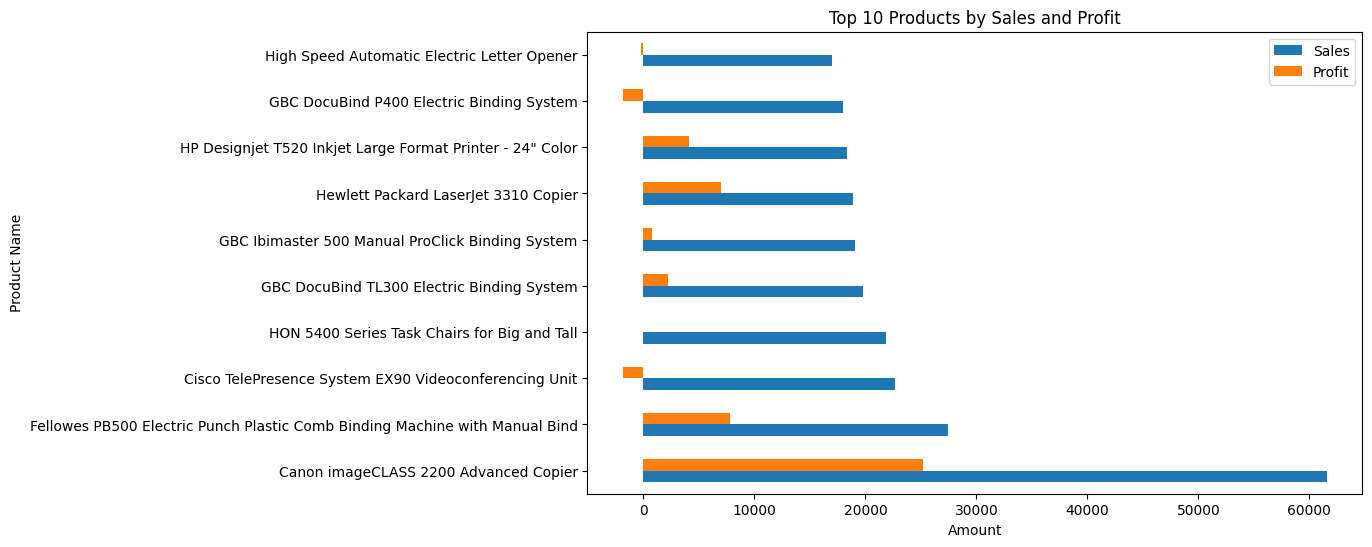

In [ ]:
# Top 10 Products by Sales and Profit Analysis
top_prod = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)
top_prod.plot(kind='barh', figsize=(10, 6), title='Top 10 Products by Sales and Profit')
plt.xlabel('Amount')
plt.ylabel('Product Name')
plt.show()

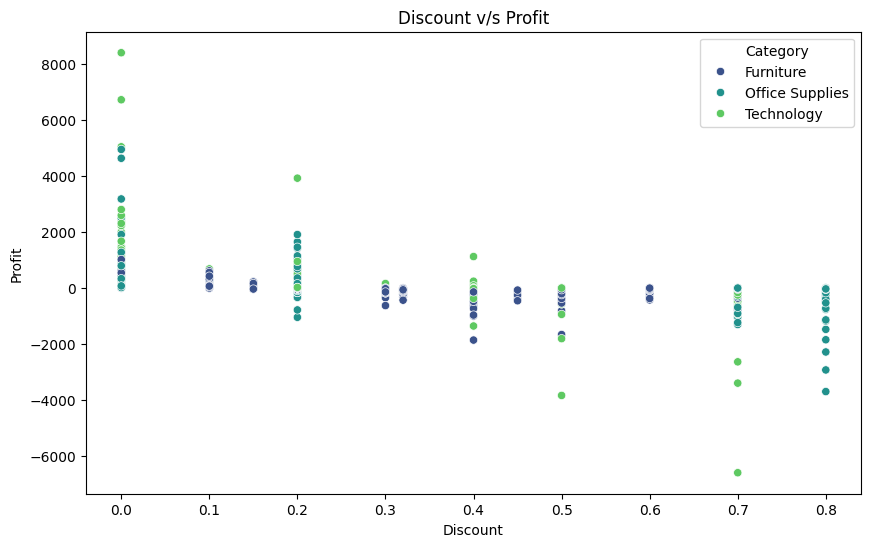

In [ ]:
# Discount v/s Profit Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', palette='viridis')
plt.title('Discount v/s Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Calculating Profit-to-Sales Ratio
category_ratio = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit',ascending=False)
category_ratio['Profit Ratio'] = category_ratio['Profit'] / category_ratio['Sales']
category_ratio

,Sales,Profit,Profit Ratio
Category,,,
Technology,836154.0330,145454.9481,0.173957
Office Supplies,719047.0320,122490.8008,0.170352
Furniture,741999.7953,18451.2728,0.024867


In [ ]:
# Calculating Customer Segment Performance
segment_efficiency = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
segment_efficiency['Efficiency'] = segment_efficiency['Profit'] / segment_efficiency['Sales']
segment_efficiency

,Sales,Profit,Efficiency
Segment,,,
Consumer,1.161401e+06,134119.2092,0.115481
Corporate,7.061464e+05,91979.1340,0.130255
Home Office,4.296531e+05,60298.6785,0.140343
